# Twitter Sentiment Analysis on BTS




*By Tracy Whitney Akinyi*

This is a Sentiment Analysis project that employs the use of Natural Language Processing. Using BTS, the world's most famous South Korean band,I felt it would be a good idea to obtain insights into how Twitter users felt about the boy band.This Notebook makes use of several Python libraries like Pandas (for Data Cleaning/Manipulation), Tweepy (for Tweets Mining), NLTK (Natural Language Toolkit), TextBlob (for Sentiment Analysis), MatPlotlib & WordCloud (for Data Exploration), Emot (for Emojis identification), Plotly (for some Data Visualisation).

**Table of Contents:**

1.   Import Libraries
2.   Tweet mining
3.   Data Cleaning.
4.   Tweet Processing.
5.   Sentiment Analysis







## 1. Import Libraries

Import all libraries that will be used in the project. I will add other libraries later on.

In [44]:
import tweepy # for tweet mining
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations. Pandas is built on Numpy
import csv # to read and write csv files
import re # In-built regular expressions library
import configparser
import string # Inbuilt string library
import glob # to retrieve files/pathnames matching a specified pattern. 
import random # generating random numbers
import requests # to send HTTP requests
from PIL import Image # for opening, manipulating, and saving many different image file f
import matplotlib.pyplot as plt # for plotting

# Natural Language Processing Toolkit
from nltk.corpus import stopwords, words # get stopwords from NLTK library & get all words in english language
from nltk.tokenize import word_tokenize # to create word tokens
# from nltk.stem import PorterStemmer (I played around with Stemmer and decided to use Lemmatizer instead)
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk import pos_tag # For Parts of Speech tagging

from textblob import TextBlob # TextBlob - Python library for processing textual data

import plotly.express as px # To make express plots in Plotly
import chart_studio.tools as cst # For exporting to Chart studio
import chart_studio.plotly as py # for exporting Plotly visualizations to Chart Studio
import plotly.offline as pyo # Set notebook mode to work in offline
pyo.init_notebook_mode()
import plotly.io as pio # Plotly renderer
import plotly.graph_objects as go # For plotting plotly graph objects
from plotly.subplots import make_subplots #to make more than one plot in Plotly


# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO # For EMOTICONS #imports emoji 

## 2. Tweet mining.

I used the *Tweepy* library for Python to scrape tweets. You need a Twitter developer account to get the keys used below for this task.

In [45]:
config = configparser.ConfigParser()


In [46]:
consumer_key = 'xxxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxx'
access_key= 'xxxxxxxxxxxxxxxxxxxxxx'
access_secret = 'xxxxxxxxxxxxxxxxxxxxx'

In [47]:
auth =tweepy.OAuthHandler(consumer_key,consumer_secret)# Pass in Consumer key and secret for authentication by API
auth.set_access_token(access_key,access_secret) # Pass in Access key and secret for authentication by API

In [48]:
api = tweepy.API(auth)

In [92]:
# obtain my tweets and combining them in a dataframe.
keywords = '#bts'
limit = 2000


tweets = list(tweepy.Cursor(api.search, q=keywords, lang="en",tweet_mode='extended').items(limit))


columns = [ 'tweet_id','created_at', 'text', 'location', 'no.retweet', 'no.favorite']
data = []
for tweet in tweets:
    data.append([tweet.user.id,tweet.created_at,tweet.full_text,tweet.user.location,tweet.retweet_count,tweet.favorite_count])
df = pd.DataFrame (data,columns=columns)
df.head()


tweet_id          created_at  \
0  1298161331972059136 2022-08-31 11:47:37   
1  1555565056191897601 2022-08-31 11:47:37   
2  1533887566767865857 2022-08-31 11:47:37   
3  1533887566767865857 2022-08-31 11:47:37   
4  1323950916827926528 2022-08-31 11:47:37   

                                                text  \
0  RT @yassagh82: I'm voting for #YetToCome by #B...   
1  #WithYou130M\n\nMy billboard Hot Trending Song...   
2  RT @yassagh82: I'm voting for #YetToCome by #B...   
3  RT @yassagh82: I'm voting for #YetToCome by #B...   
4  Namjoon's Instagram Story:-\n\n🖇️ https://t.co...   

                       location  no.retweet  no.favorite  
0             خال زیرلب نامجون♡           5            0  
1                                         0            0  
2             لبخند‌مین‌یونگی..           5            0  
3             لبخند‌مین‌یونگی..           5            0  
4  BTS×ARMY💜•16•Asian she/they📍           0            0

In [93]:
df.shape #Get number of rows and columns

(2000, 6)

## 3. Data Cleaning.

In [94]:
df.duplicated(subset='tweet_id').sum() # Check for duplicate values

1098

In [52]:
df=df.drop_duplicates(subset=['tweet_id']) # drop duplicate values

In [95]:
df.isna().any() # Check for "NaN" values

tweet_id       False
created_at     False
text           False
location       False
no.retweet     False
no.favorite    False
dtype: bool

## 4. Tweet Processing.

In [96]:
def getHashtags(tweet):
    tweet = tweet.lower()  #has to be in place
    tweet = re.findall(r'\#\w+',tweet) # Remove hastags with REGEX
    return " ".join(tweet)

In [97]:
df['Hashtags'] = df['text'].apply(getHashtags)
df.head()

tweet_id          created_at  \
0  1298161331972059136 2022-08-31 11:47:37   
1  1555565056191897601 2022-08-31 11:47:37   
2  1533887566767865857 2022-08-31 11:47:37   
3  1533887566767865857 2022-08-31 11:47:37   
4  1323950916827926528 2022-08-31 11:47:37   

                                                text  \
0  RT @yassagh82: I'm voting for #YetToCome by #B...   
1  #WithYou130M\n\nMy billboard Hot Trending Song...   
2  RT @yassagh82: I'm voting for #YetToCome by #B...   
3  RT @yassagh82: I'm voting for #YetToCome by #B...   
4  Namjoon's Instagram Story:-\n\n🖇️ https://t.co...   

                       location  no.retweet  no.favorite  \
0             خال زیرلب نامجون♡           5            0   
1                                         0            0   
2             لبخند‌مین‌یونگی..           5            0   
3             لبخند‌مین‌یونگی..           5            0   
4  BTS×ARMY💜•16•Asian she/they📍           0            0   

                                      Hashtags  
0                              #yettocome #bts  
1  #withyou130m #withyou #jimin #btsjimin #bts  
2                              #yettocome #bts  
3                              #yettocome #bts  
4                                  #bts #방탄소년단

In [98]:
hashtags_list = df['Hashtags'].tolist()

#iterate over all hashtags so they can be split where there is more than one hashtag per row
hashtags = []
for item in hashtags_list:
    item = item.split()
    for i in item:
        hashtags.append(i)

# Use the Built-in Python Collections module to determine Unique count of all hashtags used
from collections import Counter
counts = Counter(hashtags)
hashtags_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns = ['Hashtags', 'Count']
hashtags_df.sort_values(by='Count', ascending=False, inplace=True)
print (f'Total Number of Unique Hashtags is: {hashtags_df.shape[0]}.')

Total Number of Unique Hashtags is: 150.


In [99]:
hashtags_df["Percentage"] = 100*(hashtags_df["Count"]/hashtags_df['Count'].sum())
hashtags_df = hashtags_df.head(10)
hashtags_df

Hashtags  Count  Percentage
1            #bts   1642   24.304322
7      #sexynukim    878   12.995856
9             #rm    860   12.729426
8   #balmingtiger    832   12.314979
4          #jimin    399    5.905861
3        #withyou    396    5.861456
5       #btsjimin    343    5.076969
10      #taehyung    176    2.605092
0      #yettocome    156    2.309059
11             #v     93    1.376554

In [100]:
# Names of BTS members.
bts_members = ['rm','jin','suga','jhope','jimin','v','jungkook']

In [101]:
def getBtsmembers(tweet):
    tweet = tweet.lower() # Reduce tweet to lower case
    tweet_tokens = word_tokenize(tweet) # split each word in the tweet for parsing
    members= [char for char in tweet_tokens if char in bts_members] # extract members
    return " ".join(members)

In [60]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [102]:
# Extract the members to a new column
df['BTS_Members'] = df['text'].apply(getBtsmembers)
df.head()

tweet_id          created_at  \
0  1298161331972059136 2022-08-31 11:47:37   
1  1555565056191897601 2022-08-31 11:47:37   
2  1533887566767865857 2022-08-31 11:47:37   
3  1533887566767865857 2022-08-31 11:47:37   
4  1323950916827926528 2022-08-31 11:47:37   

                                                text  \
0  RT @yassagh82: I'm voting for #YetToCome by #B...   
1  #WithYou130M\n\nMy billboard Hot Trending Song...   
2  RT @yassagh82: I'm voting for #YetToCome by #B...   
3  RT @yassagh82: I'm voting for #YetToCome by #B...   
4  Namjoon's Instagram Story:-\n\n🖇️ https://t.co...   

                       location  no.retweet  no.favorite  \
0             خال زیرلب نامجون♡           5            0   
1                                         0            0   
2             لبخند‌مین‌یونگی..           5            0   
3             لبخند‌مین‌یونگی..           5            0   
4  BTS×ARMY💜•16•Asian she/they📍           0            0   

                                      Hashtags BTS_Members  
0                              #yettocome #bts              
1  #withyou130m #withyou #jimin #btsjimin #bts       jimin  
2                              #yettocome #bts              
3                              #yettocome #bts              
4                                  #bts #방탄소년단

In [103]:
characters_list = df['BTS_Members'].tolist()

#iterate over all hashtags so they can be split where there is more than one hashtag per row
characters = []
for item in characters_list:
    item = item.split()
    for i in item:
        characters.append(i)

# Use the Built-in Python Collections module to determine Unique count of all hashtags used
from collections import Counter
counts = Counter(characters)
characters_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
characters_df.columns = ['BTS_Memebrs', 'Count']
characters_df.sort_values(by='Count', ascending=False, inplace=True)
print (f'Total Number of Unique Characters is: {characters_df.shape[0]}.')
characters_df.head(10)

Total Number of Unique Characters is: 7.


BTS_Memebrs  Count
1          rm   1545
0       jimin    741
2           v     93
3    jungkook     60
5        suga     14
4         jin     11
6       jhope      9

In [104]:
characters_df['Percentage'] = 100*(characters_df['Count'] / characters_df['Count'].sum())

In [105]:
characters_df.head(10)

BTS_Memebrs  Count  Percentage
1          rm   1545   62.474727
0       jimin    741   29.963607
2           v     93    3.760615
3    jungkook     60    2.426203
5        suga     14    0.566114
4         jin     11    0.444804
6       jhope      9    0.363930

In [65]:
import nltk
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [106]:
# Defining my NLTK stop words and my user-defined stop words
stop_words = list(stopwords.words('english'))
user_stop_words = ['is','many', 'much', 'amp', 'next', 'cant', 'wont', 'hadnt','havent', 'hasnt', 
                   'isnt', 'shouldnt', 'couldnt', 'wasnt', 'werent','mustnt', '’', 'sexy', '..', '.', '.....', '....', 
                   'been…','aht', 've', 'next',"i'll","we'll","they'll","you","she'll","he",
                   "'s",'anyone','today','yesterday','day', 'already',"back","home","flight"]
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets
word_list = words.words()  # all words in English language
emojis = list(UNICODE_EMOJI.keys())  # full list of emojis

In [107]:
# Function to remove punctuations, links, emojis, and stop words
def preprocessTweets(tweet):
    tweet = tweet.lower()  #has to be in place
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w not in emojis]
    filtered_words = [w for w in filtered_words if w in word_list]

    # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them


# function to obtain adjectives from tweets
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [108]:
# Apply preProcessTweets function to the 'Text' column to generate a new column called 'Processed Tweets'.
# This returns all words used to describe BTS except for words in the lists above
df['Processed_Tweets'] = df['text'].apply(preprocessTweets)


In [69]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [109]:
df['Tweets_Adjectives'] = df['Processed_Tweets'].apply(getAdjectives)
df.head()

tweet_id          created_at  \
0  1298161331972059136 2022-08-31 11:47:37   
1  1555565056191897601 2022-08-31 11:47:37   
2  1533887566767865857 2022-08-31 11:47:37   
3  1533887566767865857 2022-08-31 11:47:37   
4  1323950916827926528 2022-08-31 11:47:37   

                                                text  \
0  RT @yassagh82: I'm voting for #YetToCome by #B...   
1  #WithYou130M\n\nMy billboard Hot Trending Song...   
2  RT @yassagh82: I'm voting for #YetToCome by #B...   
3  RT @yassagh82: I'm voting for #YetToCome by #B...   
4  Namjoon's Instagram Story:-\n\n🖇️ https://t.co...   

                       location  no.retweet  no.favorite  \
0             خال زیرلب نامجون♡           5            0   
1                                         0            0   
2             لبخند‌مین‌یونگی..           5            0   
3             لبخند‌مین‌یونگی..           5            0   
4  BTS×ARMY💜•16•Asian she/they📍           0            0   

                                      Hashtags BTS_Members  \
0                              #yettocome #bts               
1  #withyou130m #withyou #jimin #btsjimin #bts       jimin   
2                              #yettocome #bts               
3                              #yettocome #bts               
4                                  #bts #방탄소년단               

     Processed_Tweets Tweets_Adjectives  
0  voting song choice                    
1  billboard hot song                    
2  voting song choice                    
3  voting song choice                    
4               story

In [110]:
# function to return words to their base form using Lemmatizer
def preprocessTweetsSentiments(tweet):
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

In [72]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [73]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [111]:
# Apply preprocessTweetsSentiments function to the 'Processed Tweets' column to generate a new column
# called 'Processed_Tweets'
df['Tweets_Sentiments'] = df['Processed_Tweets'].apply(preprocessTweetsSentiments)

In [112]:
df.head()

tweet_id          created_at  \
0  1298161331972059136 2022-08-31 11:47:37   
1  1555565056191897601 2022-08-31 11:47:37   
2  1533887566767865857 2022-08-31 11:47:37   
3  1533887566767865857 2022-08-31 11:47:37   
4  1323950916827926528 2022-08-31 11:47:37   

                                                text  \
0  RT @yassagh82: I'm voting for #YetToCome by #B...   
1  #WithYou130M\n\nMy billboard Hot Trending Song...   
2  RT @yassagh82: I'm voting for #YetToCome by #B...   
3  RT @yassagh82: I'm voting for #YetToCome by #B...   
4  Namjoon's Instagram Story:-\n\n🖇️ https://t.co...   

                       location  no.retweet  no.favorite  \
0             خال زیرلب نامجون♡           5            0   
1                                         0            0   
2             لبخند‌مین‌یونگی..           5            0   
3             لبخند‌مین‌یونگی..           5            0   
4  BTS×ARMY💜•16•Asian she/they📍           0            0   

                                      Hashtags BTS_Members  \
0                              #yettocome #bts               
1  #withyou130m #withyou #jimin #btsjimin #bts       jimin   
2                              #yettocome #bts               
3                              #yettocome #bts               
4                                  #bts #방탄소년단               

     Processed_Tweets Tweets_Adjectives   Tweets_Sentiments  
0  voting song choice                    voting song choice  
1  billboard hot song                    billboard hot song  
2  voting song choice                    voting song choice  
3  voting song choice                    voting song choice  
4               story                                 story

## 5. Sentiment Analysis

In this section, the aim was to show the most common words and adjectives used by Twitter Users on BTS. I also made use of WordCloud and MatPlotlib for this task.

In [113]:
# Create function to obtain Subjectivity Score
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

# Create function to obtain Polarity Score
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Create function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [114]:
# Apply all functions above to respective columns
df['Subjectivity']=df['Tweets_Sentiments'].apply(getSubjectivity)
df['Polarity']=df['Tweets_Sentiments'].apply(getPolarity)
df['Sentiment']=df['Polarity'].apply(getSentimentTextBlob)

In [115]:
# See quick results of the Sentiment Analysis
df['Sentiment'].value_counts()

Positive    1418
Neutral      559
Negative      23
Name: Sentiment, dtype: int64

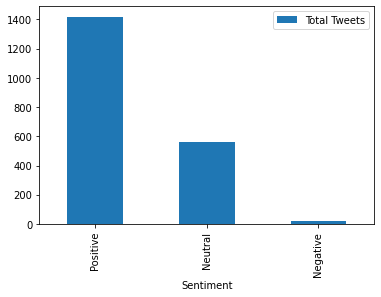

In [116]:
bar_chart = df['Sentiment'].value_counts().rename_axis('Sentiment').to_frame('Total Tweets').reset_index()
bar_chart.plot.bar( x = 'Sentiment', y='Total Tweets')

In [117]:
df.head()

tweet_id          created_at  \
0  1298161331972059136 2022-08-31 11:47:37   
1  1555565056191897601 2022-08-31 11:47:37   
2  1533887566767865857 2022-08-31 11:47:37   
3  1533887566767865857 2022-08-31 11:47:37   
4  1323950916827926528 2022-08-31 11:47:37   

                                                text  \
0  RT @yassagh82: I'm voting for #YetToCome by #B...   
1  #WithYou130M\n\nMy billboard Hot Trending Song...   
2  RT @yassagh82: I'm voting for #YetToCome by #B...   
3  RT @yassagh82: I'm voting for #YetToCome by #B...   
4  Namjoon's Instagram Story:-\n\n🖇️ https://t.co...   

                       location  no.retweet  no.favorite  \
0             خال زیرلب نامجون♡           5            0   
1                                         0            0   
2             لبخند‌مین‌یونگی..           5            0   
3             لبخند‌مین‌یونگی..           5            0   
4  BTS×ARMY💜•16•Asian she/they📍           0            0   

                                      Hashtags BTS_Members  \
0                              #yettocome #bts               
1  #withyou130m #withyou #jimin #btsjimin #bts       jimin   
2                              #yettocome #bts               
3                              #yettocome #bts               
4                                  #bts #방탄소년단               

     Processed_Tweets Tweets_Adjectives   Tweets_Sentiments  Subjectivity  \
0  voting song choice                    voting song choice          0.00   
1  billboard hot song                    billboard hot song          0.85   
2  voting song choice                    voting song choice          0.00   
3  voting song choice                    voting song choice          0.00   
4               story                                 story          0.00   

   Polarity Sentiment  
0      0.00   Neutral  
1      0.25  Positive  
2      0.00   Neutral  
3      0.00   Neutral  
4      0.00   Neutral

In [118]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = df['Tweets_Adjectives'].tolist()
tweets_long_string = " ".join(tweets_long_string)


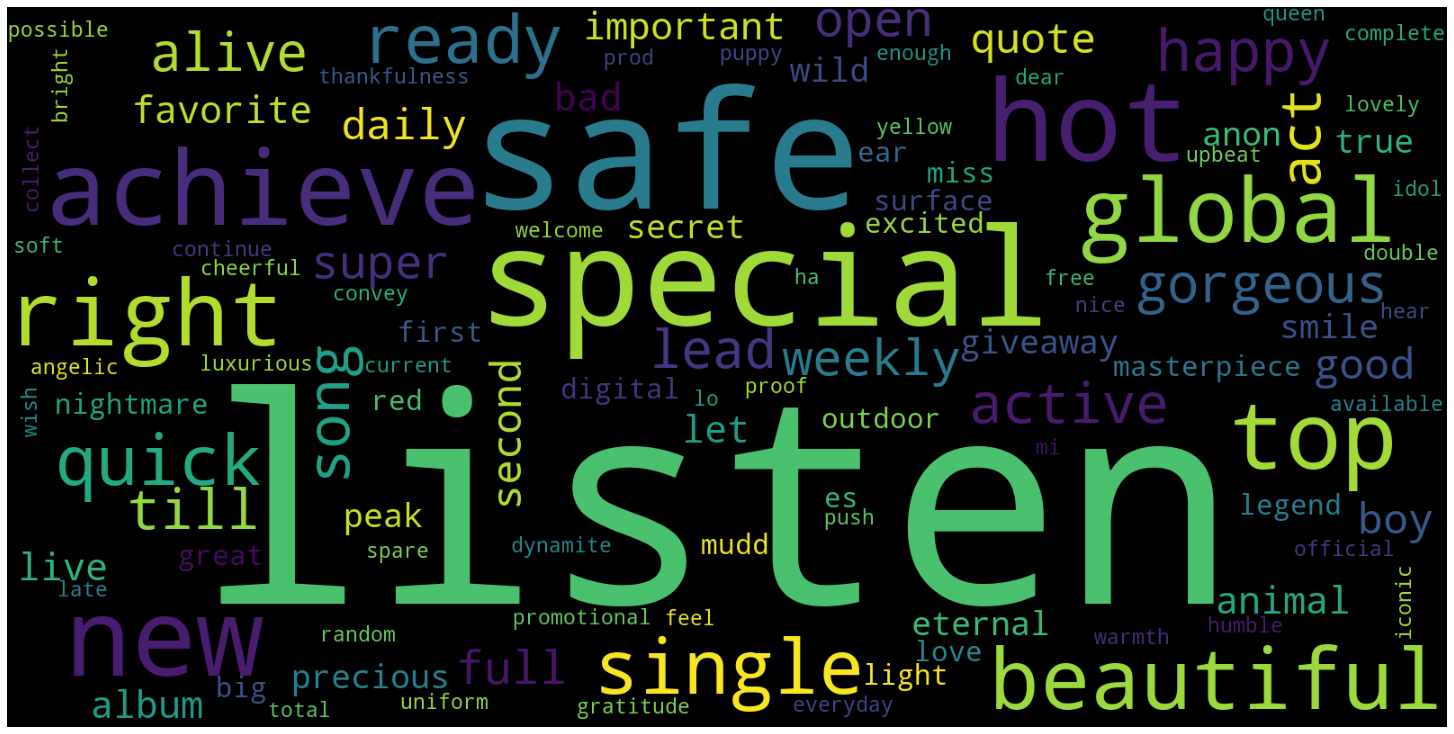

In [119]:
wordcloud = WordCloud(max_words=1000,width = 1600, height = 800,background_color ='black',collocations=False).generate(tweets_long_string)
 
# plot the WordCloud image                      
plt.figure(figsize = (20,20), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [120]:
tweets_long_string = df['Tweets_Adjectives'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [121]:
# Use the Built-in Python Collections module to determine Word frequency
from collections import Counter
counts = Counter(tweets_list)
df1 = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df1.columns = ['Words', 'Count']
df1.sort_values(by='Count', ascending=False, inplace=True)

In [122]:
df1.head(10)

Words  Count
0      listen    669
6        safe     89
9     special     60
12        hot     39
27        new     37
5     achieve     33
11        top     27
8       right     25
10     global     24
20  beautiful     21

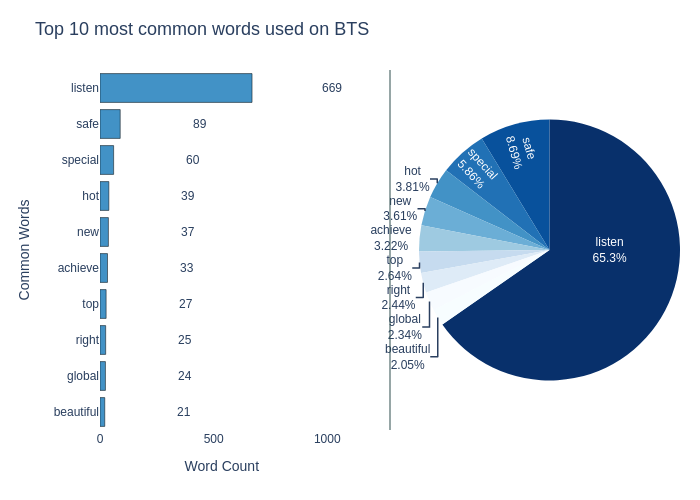

In [123]:
# print(px.colors.sequential.Blues_r) to get the colour list used here. Please note, I swatched some colours

# Define my colours for the Plotly Plot
colors = ['rgb(8,48,107)', 'rgb(8,81,156)', 'rgb(33,113,181)', 'rgb(66,146,198)',
            'rgb(107,174,214)', 'rgb(158,202,225)', 'rgb(198,219,239)',
            'rgb(222,235,247)', 'rgb(247,251,255)', 'rgb(247,253,255)']

# Set layout for Plotly Subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, { "type": "domain"}]],
                    vertical_spacing=0.001)

# Add First Plot
fig.add_trace(go.Bar(x = df1['Count'].head(10), y=df1['Words'].head(10),marker=dict(color='rgba(66,146,198, 1)',
            line=dict(color='Black'),),name='Bar Chart',orientation='h'), 1, 1)

# Add Second Plot
fig.add_trace(go.Pie(labels=df1['Words'].head(10),values=df1['Count'].head(15),textinfo='label+percent',
                    insidetextorientation='radial', marker=dict(colors=colors, line=dict(color='DarkSlateGrey')),
                    name='Pie Chart'), 1, 2)
# customize layout
fig.update_layout(shapes=[dict(type="line",xref="paper", yref="paper", x0=0.5, y0=0, x1=0.5, y1=1.0,
         line_color='DarkSlateGrey', line_width=1)])

# customize plot title
fig.update_layout(showlegend=False, title=dict(text="Top 10 most common words used on BTS",
                  font=dict(size=18, )))

# Customize backgroound, margins, axis, title
fig.update_layout(yaxis=dict(showgrid=False,
                             showline=False,
                             showticklabels=True,
                             domain=[0, 1],
                             categoryorder='total ascending',
                             title=dict(text='Common Words', font_size=14)),
                             xaxis=dict(zeroline=False,
                             showline=False,
                             showticklabels=True,
                             showgrid=True,
                             domain=[0, 0.42],
                             title=dict(text='Word Count', font_size=14)),
                             margin=dict(l=100, r=20, t=70, b=70),
                             paper_bgcolor='rgba(0,0,0,0)',
                             plot_bgcolor='rgba(0,0,0,0)')

# Specify X and Y values for Annotations
x = df1['Count'].head(10).to_list()
y = df1['Words'].head(10).to_list()

# Show annotations on plot
annotations = [dict(xref='x1', yref='y1', x=xa + 350, y=ya, text=str(xa), showarrow=False) for xa, ya in zip(x, y)]

fig.update_layout(annotations=annotations)
fig.show(renderer = 'png')

In [125]:
#export dataset to csv format
df.to_csv("Twitter_sentiment_bts1.csv")